No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


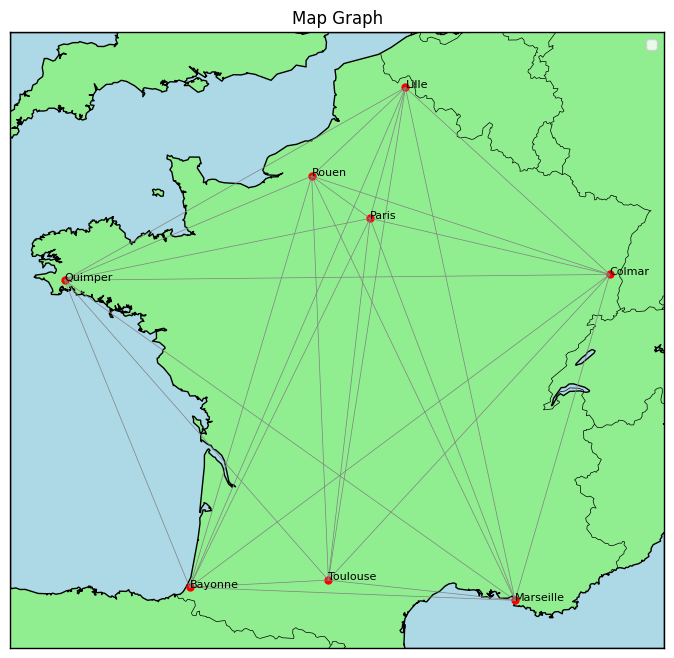

In [7]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

#graph = RandomGraph(node_number=40,min_weight=1,max_weight=100)
        
# cities = [
#     "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
#     "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
#     "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
#     "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
#     "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
#     "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
#     "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
#     "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
# ]

#cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]
#create real graph
graph = MapGraph(cities=cities,start_city="Rouen")

graph.plot_graph()

Removed 0 edges of 28
Costed 0 edges of 28


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


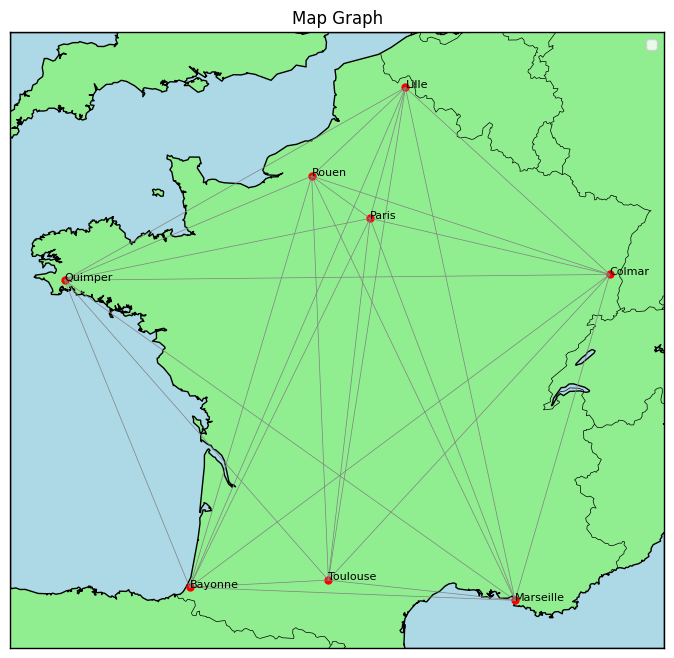

In [8]:
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

graph.plot_graph()

Algorithm ACO : 100 ants, 1 vehicule : 



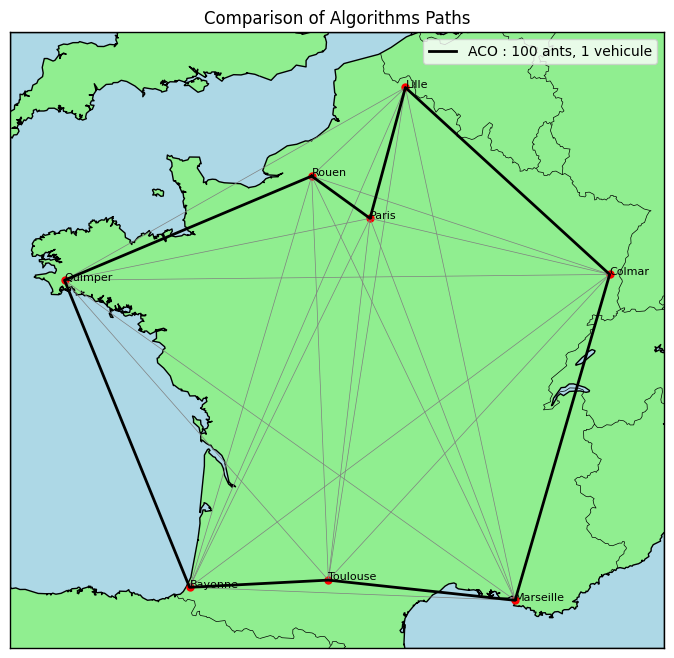

Best paths: [['Rouen', 'Paris', 'Lille', 'Colmar', 'Marseille', 'Toulouse', 'Bayonne', 'Quimper', 'Rouen']]
Total distance: 2798.099589479604
Number of iterations needed to find the solution : 2
Total number of iterations : 51
Algorithm ACO : 100 ants,2 vehicles : 



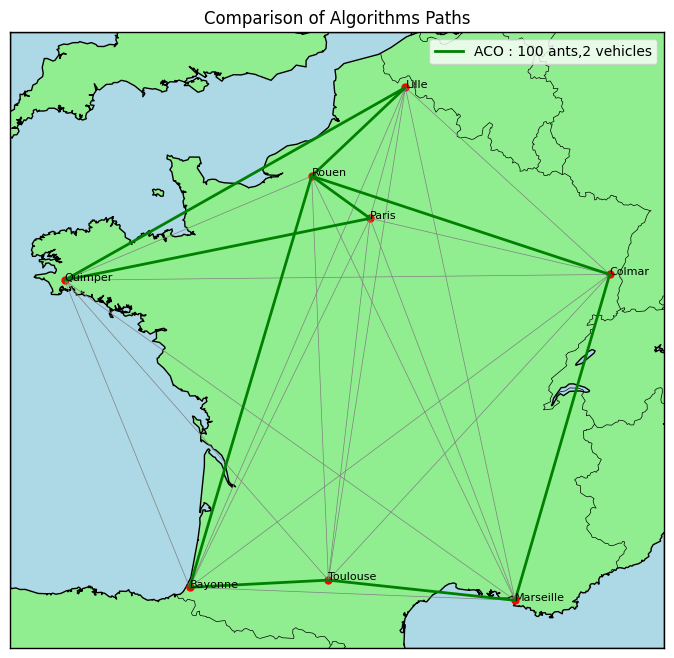

Best paths: [['Rouen', 'Bayonne', 'Toulouse', 'Marseille', 'Colmar', 'Rouen'], ['Rouen', 'Lille', 'Quimper', 'Paris', 'Rouen']]
Total distance: 3664.184438069673
Number of iterations needed to find the solution : 32
Total number of iterations : 51
Algorithm ACO : 100 ants,3 vehicles : 



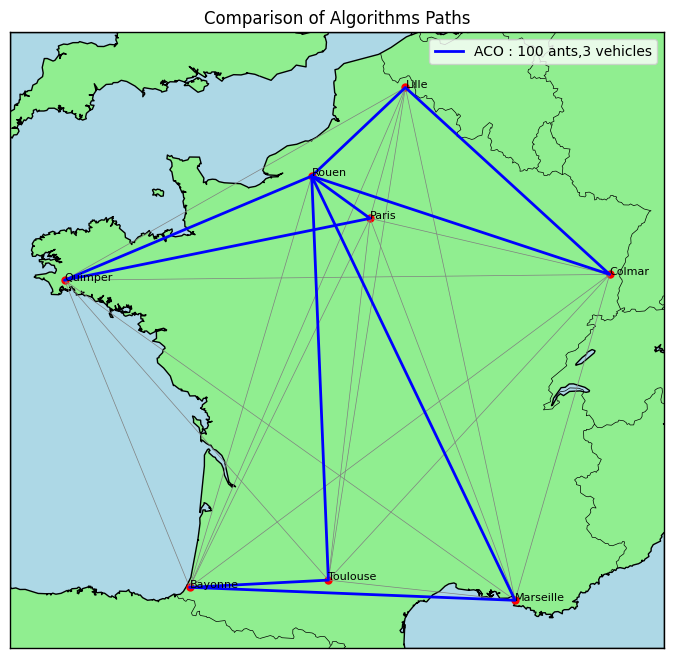

Best paths: [['Rouen', 'Toulouse', 'Bayonne', 'Marseille', 'Rouen'], ['Rouen', 'Quimper', 'Paris', 'Rouen'], ['Rouen', 'Colmar', 'Lille', 'Rouen']]
Total distance: 4301.165915495527
Number of iterations needed to find the solution : 13
Total number of iterations : 51
Algorithm ACO : 100 ants,4 vehicles : 



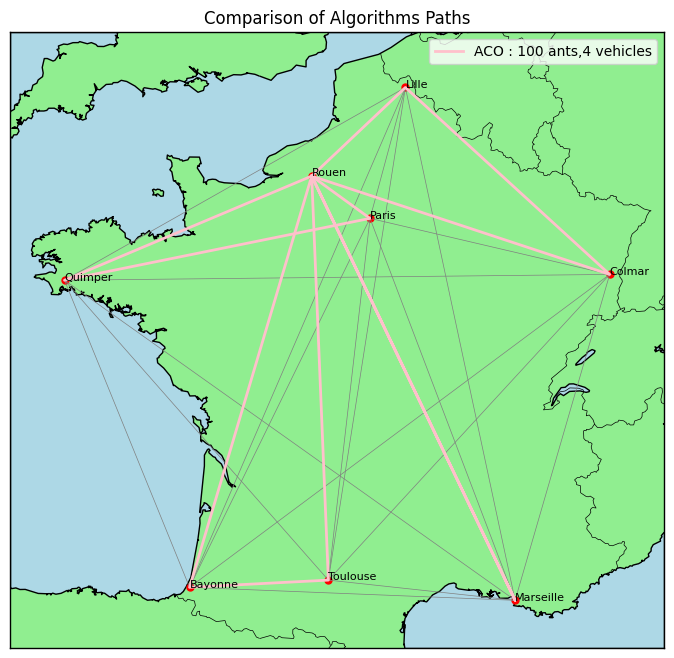

Best paths: [['Rouen', 'Colmar', 'Lille', 'Rouen'], ['Rouen', 'Quimper', 'Paris', 'Rouen'], ['Rouen', 'Marseille', 'Rouen'], ['Rouen', 'Toulouse', 'Bayonne', 'Rouen']]
Total distance: 5195.200421951965
Number of iterations needed to find the solution : 1
Total number of iterations : 51
Algorithm ACO : 100 ants,5 vehicles : 



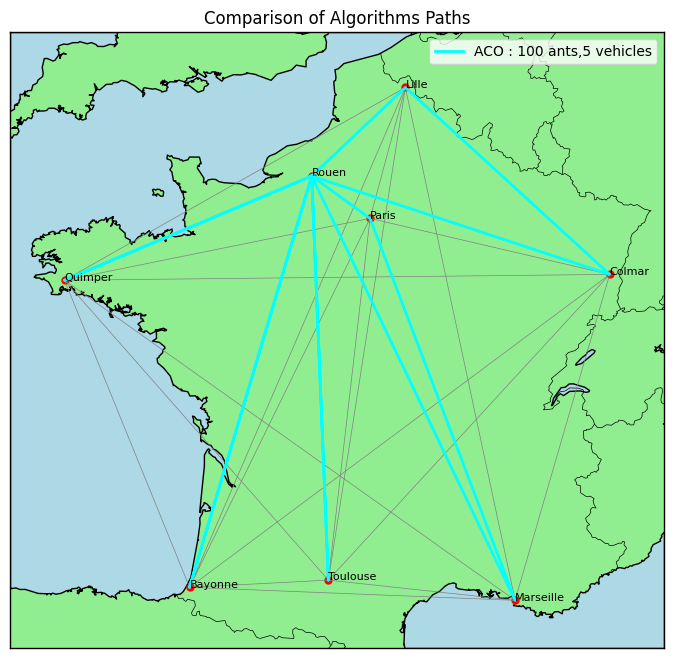

Best paths: [['Rouen', 'Bayonne', 'Rouen'], ['Rouen', 'Paris', 'Marseille', 'Rouen'], ['Rouen', 'Quimper', 'Rouen'], ['Rouen', 'Toulouse', 'Rouen'], ['Rouen', 'Lille', 'Colmar', 'Rouen']]
Total distance: 6133.141962088345
Number of iterations needed to find the solution : 0
Total number of iterations : 51


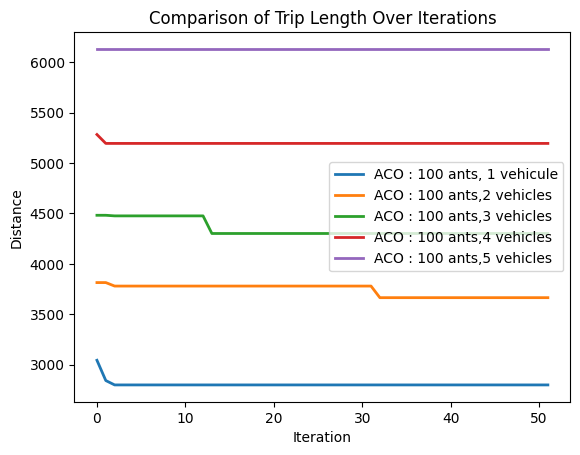

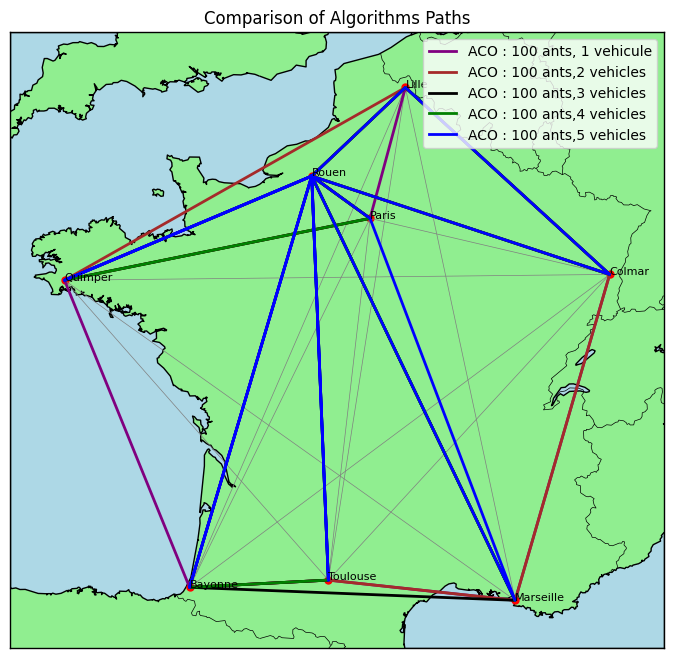

In [9]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        run_algorithm(graph,algorithm)
    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 100
convergence_threshold = 10
# ACO0 = AcoAlgo(graph=graph, name="ACO : 500 ants", num_ants=500, num_vehicles=1,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO1 = AcoAlgo(graph=graph, name="ACO : 100 ants, 1 vehicule", num_ants=100, num_vehicles=1,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO2 = AcoAlgo(graph=graph, name="ACO : 100 ants,2 vehicles", num_ants=100, num_vehicles=2,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO3 = AcoAlgo(graph=graph, name="ACO : 100 ants,3 vehicles", num_ants=100, num_vehicles=3,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO4 = AcoAlgo(graph=graph, name="ACO : 100 ants,4 vehicles", num_ants=100, num_vehicles=4,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO5 = AcoAlgo(graph=graph, name="ACO : 100 ants,5 vehicles", num_ants=100, num_vehicles=5,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# GREEDY0 = GreedyAlgo(graph=graph, name= "Greedy Loop",min_iterations=min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [ACO1,ACO2,ACO3,ACO4,ACO5]
run_algorithms(graph= graph,algorithms=algorithms)

#reset all datas
# del ACO0
del ACO1
del ACO2
del ACO3
del ACO4
del ACO5
# del GREEDY0
del algorithms
del algorithms_distance_results
del algorithms_path_results

